# Stack Overflow Annual Developer Survey 2017

In [1]:
import pandas
import matplotlib
import numpy

In [2]:
%matplotlib inline

In [3]:
all_df = pandas.read_csv('data/survey_results_public.csv', index_col=0)
all_df.info()
all_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51392 entries, 1 to 51392
Columns: 153 entries, Professional to ExpectedSalary
dtypes: float64(6), object(147)
memory usage: 60.4+ MB


,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preproccesing

Assuming that the `NaN` in *Currency* column means dollars ($).
The Stack Overflow Annual Developer Survey 2017
[Methodology](https://insights.stackoverflow.com/survey/2017#methodology) states:

> We converted salaries given in the 38 most-frequently-used currencies to [dollars / Euros / pounds sterling]
> using the exchange rate that prevailed mid-way through the survey field period.

Also the data on [survey result page](https://insights.stackoverflow.com/survey/2016) are in dollars.

In [4]:
# different currencies
all_df['Currency'].unique()

array([nan, 'British pounds sterling (£)', 'Canadian dollars (C$)',
       'U.S. dollars ($)', 'Euros (€)', 'Brazilian reais (R$)',
       'Indian rupees (?)', 'Polish zloty (zl)', 'Swedish kroner (SEK)',
       'Russian rubles (?)', 'Swiss francs', 'Australian dollars (A$)',
       'Mexican pesos (MXN$)', 'Japanese yen (¥)',
       'Chinese yuan renminbi (¥)', 'Singapore dollars (S$)',
       'Bitcoin (btc)', 'South African rands (R)'], dtype=object)

In [5]:
# source (27. 10. 2017) https://www.cnb.cz/cs/financni_trhy/devizovy_trh/kurzy_devizoveho_trhu/denni_kurz.jsp
# dictionary of exchange rates to CZK
currencies = {
    'British pounds sterling (£)': 28.747,
    'Canadian dollars (C$)': 17.017,
    'U.S. dollars ($)': 21.779,
    numpy.nan: 21.779,
    'Euros (€)': 25.585,
    'Brazilian reais (R$)': 6.730,
    'Indian rupees (?)': 33.579 / 100,
    'Polish zloty (zl)': 6.041,
    'Swedish kroner (SEK)': 2.632,
    'Russian rubles (?)': 37.768 / 100,
    'Swiss francs': 21.915,
    'Australian dollars (A$)': 16.785,
    'Mexican pesos (MXN$)': 1.144,
    'Japanese yen (¥)': 19.136,
    'Chinese yuan renminbi (¥)': 3.283,
    'Singapore dollars (S$)': 15.988,
    'Bitcoin (btc)': 5862.19 * 21.779,
    'South African rands (R)': 1.529
}

def convert_to_czk(df, currencies=currencies):
    return df['Salary'] * df['Currency'].apply(currencies.get)

In [6]:
all_df['SalaryCZK'] = convert_to_czk(all_df)

## How many people filled the survery?

In [7]:
print('Number of people who filled the survey:')
# Index.size return the number of elements in the underlying data
print(all_df.index.size)

Number of people who filled the survey:
51392


## How many of them were from Czechia or Slovakia?

Relevant column is *Country (Q110. In which country do you currently live?)*.
Combo box was provided.
Czech Republic and Slovak Republic are items of interest.

In [8]:
cs_idx = ((all_df['Country'] == 'Czech Republic') | (all_df['Country'] == 'Slovak Republic'))
cs_df = all_df[cs_idx]
print('Number of people from Czechia and Slovakia:')
print(cs_idx.sum())

Number of people from Czechia and Slovakia:
581


## What is programmers' annaul salary in Czechia and Slovakia according to the survey? In the world?

Relevant column *Salary (Q320. What is your current annual salary, in \[currency from Q310\]?
Please enter a whole number in the box below, without any punctuation. If you prefer not to
answer, please leave the box empty / blank.)*.
It is a 10-digit whole number.
The person has to be professional software and currently employed.
Currency is in column *Currency*.

In [9]:
def notnull_salary(df):
    return df.loc[df['SalaryCZK'].notnull(), ['SalaryCZK', 'Currency']]

cs_salary = notnull_salary(cs_df)
cs_salary.head()

,SalaryCZK,Currency
Respondent,,
1484,276288.018794,NaN
1913,341096.319499,NaN
3367,409315.583399,NaN
3609,577725.806452,Euros (€)
3917,469007.439311,NaN


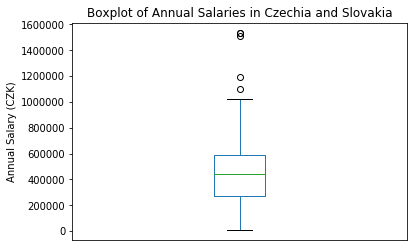

In [10]:
ax = cs_salary.plot.box()
ax.set_ylabel('Annual Salary (CZK)')
ax.set_xticks([])
_ = ax.set_title('Boxplot of Annual Salaries in Czechia and Slovakia')

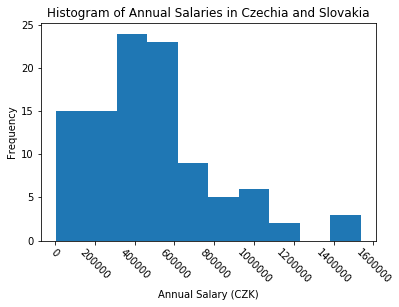

In [11]:
ax = cs_salary.plot.hist(rot=315)
ax.set_title('Histogram of Annual Salaries in Czechia and Slovakia')
ax.legend_.remove()
_ = ax.set_xlabel('Annual Salary (CZK)')

In [12]:
cs_salary.describe()

,SalaryCZK
count,1.020000e+02
mean,4.849463e+05
std,3.259255e+05
min,5.542815e+03
25%,2.754026e+05
50%,4.452096e+05
75%,5.906401e+05
max,1.534933e+06


In [13]:
print('Average annual salary of programmers in Czechia and Slovakia:')
print(cs_salary['SalaryCZK'].mean(), 'CZK')

Average annual salary of programmers in Czechia and Slovakia:
484946.312173 CZK


IMHO median is more robust statistic (resistant to outliers).

In [14]:
print('Median annual salary of programmers in Czechia and Slovakia:')
print(cs_salary['SalaryCZK'].median(), 'CZK')

Median annual salary of programmers in Czechia and Slovakia:
445209.5923746009 CZK


In [15]:
all_salary = notnull_salary(all_df)

print('Average annual salary of programmers in world:')
print(all_salary['SalaryCZK'].mean(), 'CZK\n')
print('Median annual salary of programmers in world:')
print(all_salary['SalaryCZK'].median(), 'CZK')

Average annual salary of programmers in world:
3180864.90974 CZK

Median annual salary of programmers in world:
1155451.6129032245 CZK


The gap between mean and median is more significant here because of huge outliers (see boxplot below).

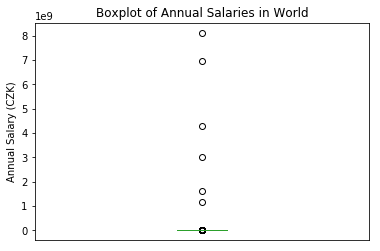

In [16]:
ax = all_salary.plot.box()
ax.set_ylabel('Annual Salary (CZK)')
ax.set_xticks([])
_ = ax.set_title('Boxplot of Annual Salaries in World')

## How many people stated that they use Python?

Using a language means that the person was intensively working with it for the last year.

## How many people from them want to continue using Python?

## How many people do not use Python but want to start using it?

In [17]:
def contains_language(series, language):
    # fillna so that return value can be used as index
    return series.str.contains(language).fillna(False)

def have_worked_in(df, language):
    return contains_language(df['HaveWorkedLanguage'], language)

def want_work_in(df, language):
    return contains_language(df['WantWorkLanguage'], language)

def language_stats(df, language):
    use_idx = have_worked_in(df, language)
    use = use_idx.sum()
    stick = want_work_in(df.loc[use_idx], language).sum()
    want_idx = want_work_in(df, language)
    want = ((want_idx ^ use_idx) & ~use_idx).sum()
    return use, stick, want

def print_language_stats(df, language):
    use, stick, want = language_stats(df, language)
    print(('Number of people who use {}:\n'
           '{}\n\n'
           'Number of people from them who want to continue using {}:\n'
           '{}\n\n'
           'Number of people who don\'t use {} but want to start:\n'
           '{}').format(language, use, language, stick, language, want))

In [18]:
print_language_stats(all_df, 'Python')

Number of people who use Python:
11704

Number of people from them who want to continue using Python:
7340

Number of people who don't use Python but want to start:
5230


## Answer the last three questions for Java instead of Python.

In [19]:
print_language_stats(all_df, 'Java')

Number of people who use Java:
28149

Number of people from them who want to continue using Java:
18427

Number of people who don't use Java but want to start:
2310


## For each programming language, which people from Czechia and Slovakia stated, *draw a plot* showing average *monthly* salary of people who use the language.

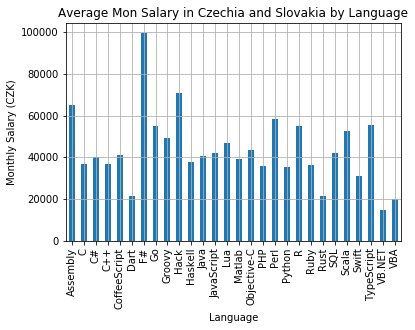

In [20]:
lang_cs_df = cs_df[cs_df['HaveWorkedLanguage'].notnull() & cs_df['SalaryCZK'].notnull()]

lang_cs_df = pandas.concat([pandas.DataFrame({'HaveWorkedLanguage': row['HaveWorkedLanguage'].split('; '),
                                              'SalaryCZK': row['SalaryCZK']},
                                             index=[idx] * len(row['HaveWorkedLanguage'].split('; ')))
                            for idx, row in lang_cs_df.iterrows()])

ax = lang_cs_df.groupby('HaveWorkedLanguage').mean().div(12).plot.bar()
ax.set_title('Average Mon Salary in Czechia and Slovakia by Language')
ax.set_xlabel('Language')
ax.legend_.remove()
ax.grid()
_ = ax.set_ylabel('Monthly Salary (CZK)')